In [2]:
from face_ai.deepnet.models import load_model
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
from face_ai.data import *
from face_ai.deepnet.preprocessing.image import load_img, img_to_array
from pandas_ml import ConfusionMatrix
from sklearn.metrics import classification_report
import random
%matplotlib inline

# Training

Perbandingan loss dan akurasi terhadap epoch pada pelatihan dan validasi

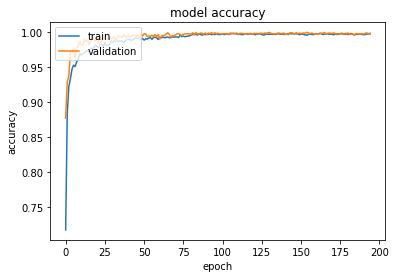

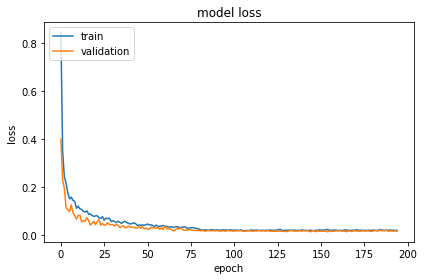

In [3]:
# summarize history for accuracy
log_data = pd.read_csv('train_data/logs/training.log')
plt.plot(log_data['acc'])
plt.plot(log_data['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(log_data['loss'])
plt.plot(log_data['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Pengujian

Sampel data pengujian:

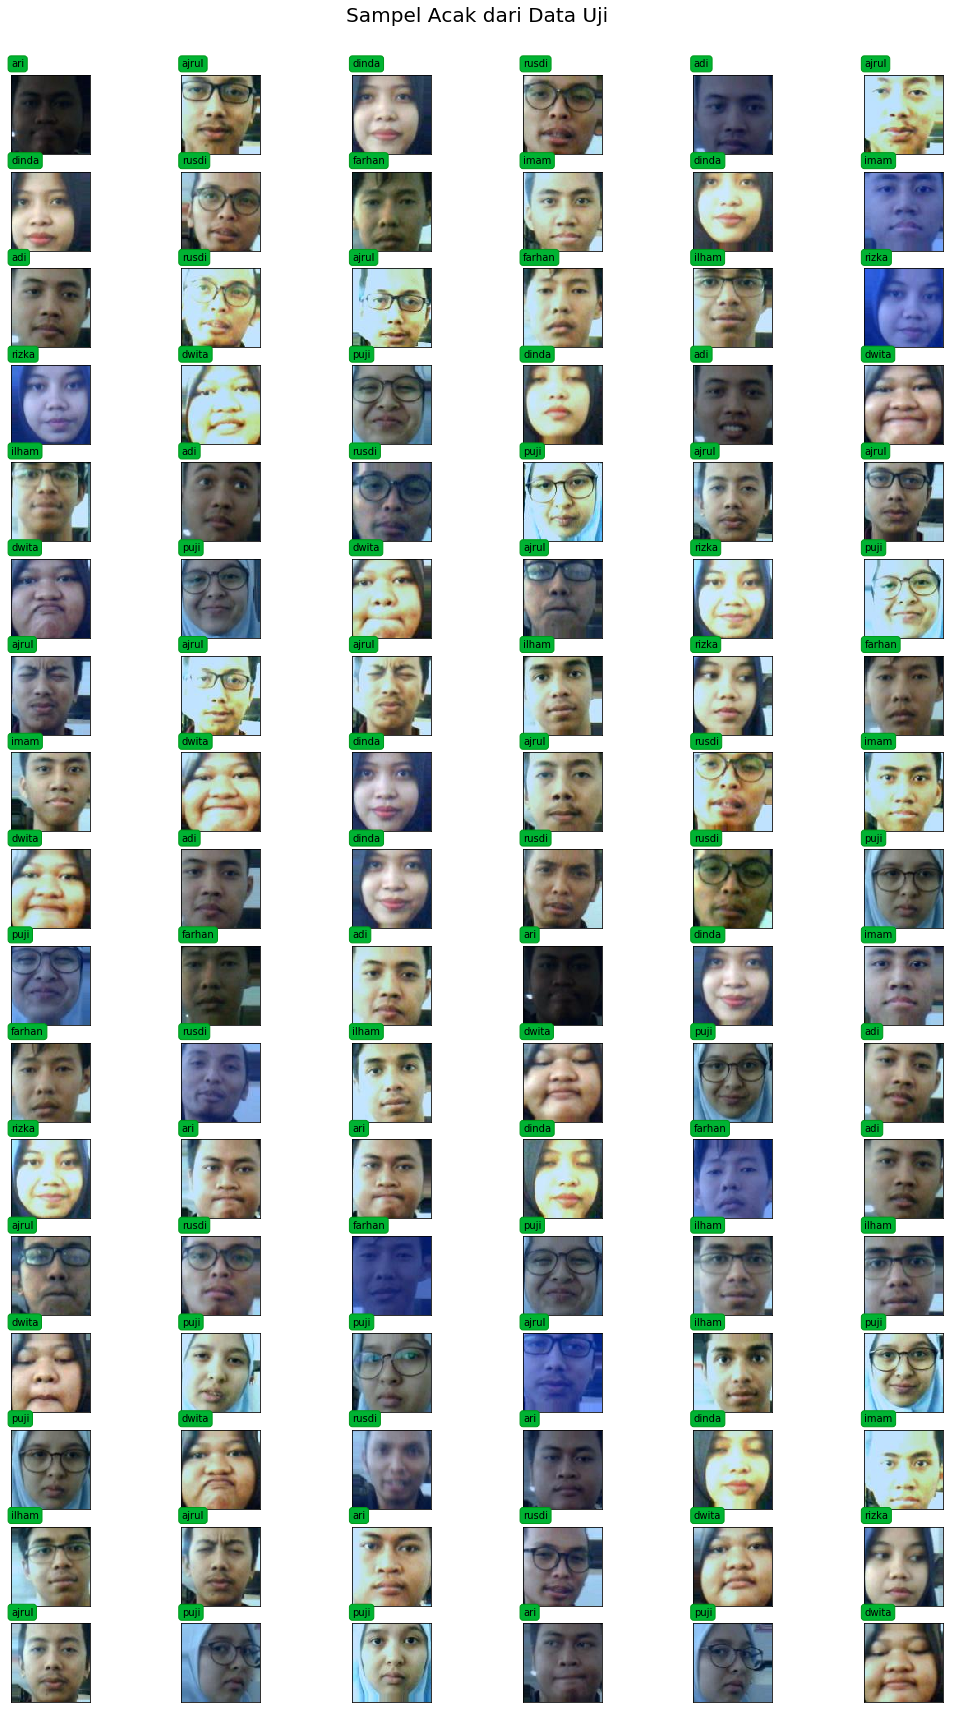

In [4]:
root_dir = 'test_data/val'
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
fig.suptitle('Sampel Acak dari Data Uji', fontsize=20)
sorted_dirs = sorted(os.listdir(root_dir))
for i in range(rows):
    for j in range(cols):
        face_dir = sorted_dirs[random.randint(0,len(sorted_dirs)-1)]
        all_files = os.listdir(os.path.join(root_dir, face_dir))
        rand_img = np.random.choice(all_files)
        img = plt.imread(os.path.join(root_dir, face_dir, rand_img))
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        ax[i][j].text(0, -20, face_dir, size=10, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### 1. Memuat model dan data uji

In [5]:
#load model
model = load_model('train_data/models/_vgg16_.145-1.00.hdf5',compile=False)
metadata = load_metadata(root_dir)
print(f'Test data: {len(metadata)}')

Test data: 2769


### 2. Membuat fungsi prediksi

In [6]:
def recognize(img):
    prediction = model.predict(np.expand_dims(img, axis=0))[0]

    return prediction

### 3. Memulai Pengujian

In [7]:
import pyprind


labels = pickle.load(open('face_ai/models/label_encoder','rb'))
y_pred = []

bar = pyprind.ProgBar(len(metadata),monitor=True, title='Proses Pengujian')
for data in metadata:
    path = data.image_path()
    img = load_img(path, target_size=(96, 96))
    img = img_to_array(img)
    pred = recognize(img)
    label = labels[np.argmax(pred)]
    y_pred.append(label)
    bar.update()
print(bar)

Proses Pengujian
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:27


Title: Proses Pengujian
  Started: 07/01/2019 13:01:58
  Finished: 07/01/2019 13:02:26
  Total time elapsed: 00:00:27
  CPU %: 110.50
  Memory %: 2.70


### 4. Menampilkan laporan hasil pengujian

In [8]:
y_true = [data.name for data in metadata]

true_count = 0
for true, pred in zip(y_true, y_pred):
    if true == pred:
        true_count += 1
        
acc = (true_count/len(y_true)) * 100
print(f'Overall Accuracy: {acc}%')

Overall Accuracy: 99.1332611050921%


In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

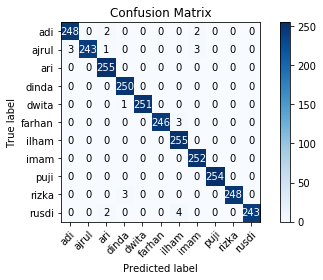

In [10]:
cm = confusion_matrix(y_true, y_pred)

cmap=plt.cm.Blues
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
xticklabels=labels, yticklabels=labels,
title='Confusion Matrix',
ylabel='True label',
xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

tabel precision, recal, f1-score, support

In [11]:
print(classification_report(y_true, y_pred, labels=labels))

             precision    recall  f1-score   support

        adi       0.99      0.98      0.99       252
      ajrul       1.00      0.97      0.99       250
        ari       0.98      1.00      0.99       255
      dinda       0.98      1.00      0.99       250
      dwita       1.00      1.00      1.00       252
     farhan       1.00      0.99      0.99       249
      ilham       0.97      1.00      0.99       255
       imam       0.98      1.00      0.99       252
       puji       1.00      1.00      1.00       254
      rizka       1.00      0.99      0.99       251
      rusdi       1.00      0.98      0.99       249

avg / total       0.99      0.99      0.99      2769

